# Titanic Dateset Exploration
## by Mohie Eldeen Elzeiny

## Preliminary Wrangling


> On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. The sinking of the Titanic is one of the most infamous shipwrecks in history. In this challenge, we will explore the dataset and try to answer the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#reading the CSV files
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#the shape of the dataset
titanic.shape

(891, 12)

In [5]:
#checking for duplicates
titanic.duplicated().sum()

0

In [6]:
#searching for null values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


> #### we have three columns that have missing values which are age, cabin and embarked so first we willhave to deal with them

> for filling the missing values of the age we will need a refernce to fill the age w.r.t that refrence. if we look at the names we will notice that the names contain the titles which is a good reference to relay upon to fill the age missing values

In [7]:
#exctracting the Title of every name of the dataset and assign it to the column 'Title'
titanic['Title'] = titanic['Name'].str.extract('([A-Za-z]+)\.')

In [8]:
titanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Don           1
Ms            1
Countess      1
Lady          1
Mme           1
Sir           1
Capt          1
Name: Title, dtype: int64

In [9]:
#the median of the ages of each title 
titanic.groupby('Title')['Age'].median()

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          46.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.5
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          30.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64

In [10]:
#filling the missing values is the Age feature
titanic.Age.fillna( titanic.groupby('Title')['Age'].transform('median') , inplace = True)

In [11]:
#checking that we filled all the missing values
titanic.Age.isnull().sum()

0

In [12]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

> *the majority of the data set have a value of 'S' regarding to the Ebmbarked feature so it's maybe safe to fill the missing values with 'S'*

In [13]:
titanic['Embarked'].fillna('S' , inplace = True)

In [14]:
#deleting the unneccessary features that gives us no information and to make our data ready for the visualisations
titanic.drop(['PassengerId' , 'Name' , 'Ticket' , 'Cabin'] , axis = 1 , inplace = True)

In [15]:
titanic.shape

(891, 9)

In [16]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


### What is the structure of your dataset?

> the titanic dataset after some preprocessing has 891 observations and 9 feature. 7 of these features are categorical and 2 are Quantitative (age and fare)

### What is/are the main feature(s) of interest in your dataset?

> the main feature of interest is the 'Survived' feature and the relationship between it and the other feature.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think I will explore all the existing features to see the relationship between them and survival rate

## Univariate Exploration



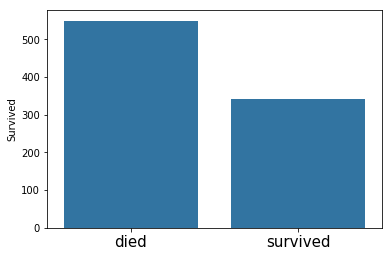

In [17]:
#looking the at the survival rate
x = titanic.Survived.value_counts().index
y = titanic.Survived.value_counts()
sb.barplot( x = x , y = y , color = sb.color_palette()[0]);
plt.xticks([0,1] , ['died' , 'survived'] , size= 15);

In [18]:
titanic.Survived.value_counts() / len(titanic)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

> *the data we have is a skewed and not balanced that we have about 38% survival rate*

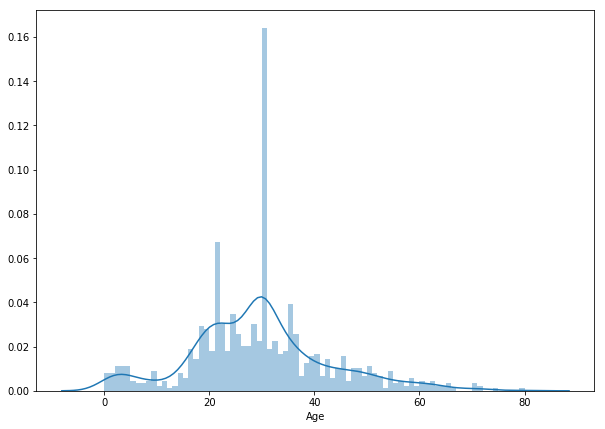

In [19]:
# the age distribution
bins = np.arange(0 , 80+1 ,1)
plt.figure(figsize= (10,7))
sb.distplot(titanic.Age , bins = bins  );

> *the distribution of the age is right skewed and that's not very normal shape that it has two spikes at nearly 5 and 35*

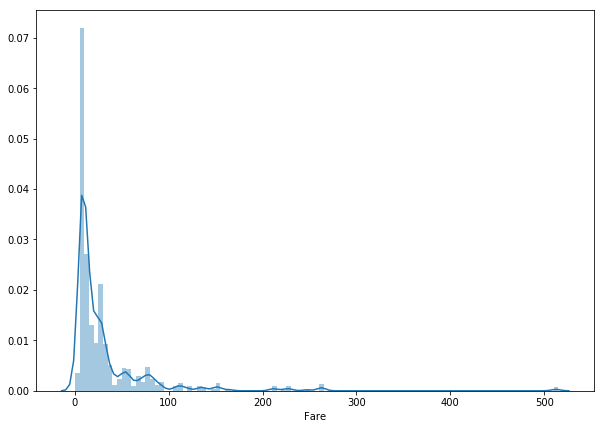

In [20]:
#the fair distribution
bins = np.arange(0 , 512+5 ,5)
plt.figure(figsize= (10,7))
sb.distplot(titanic.Fare , bins = bins  );

> *the Fare is clearly right skewed and there's a large subset of the passengers who didn't pay much compared to others.*

>*there're clearly ouliers after the 200 so maybe we can have a nicer graph if we zoom a little bit*

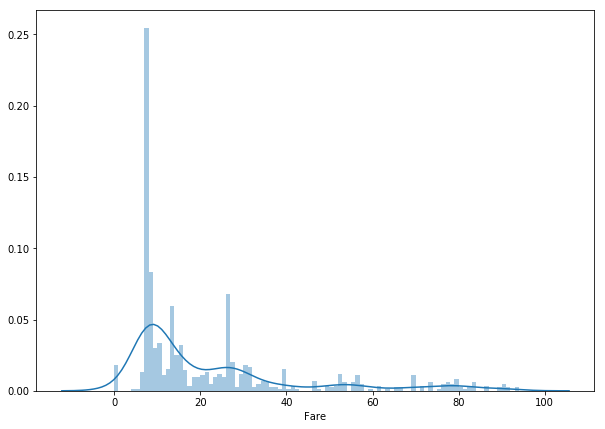

In [21]:
# only including the passengers who have fare less than 100
fare_data = titanic[titanic['Fare'] <= 100]['Fare']
bins = np.arange(0 , 100+1 ,1)
plt.figure(figsize= (10,7))
sb.distplot(fare_data , bins = bins  );

> *as I have said it's right skewed and most of the passengers paid less than 100 so there might be some outliers*

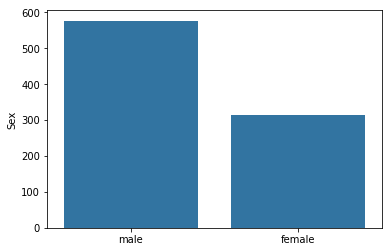

In [22]:
#looking at the ratio between males and females
x = titanic.Sex.value_counts().index
y = titanic.Sex.value_counts()
sb.barplot( x = x , y = y , color = sb.color_palette()[0]);

In [23]:
titanic.Sex.value_counts() / len(titanic)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

> *the ratio of men is  roughly twice the ratio of women*

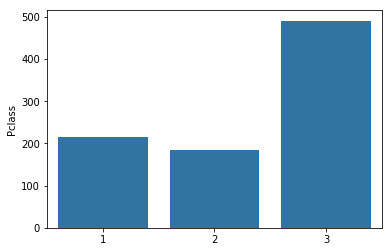

In [24]:
#looking at the ratios of classes
x = titanic.Pclass.value_counts().index
y = titanic.Pclass.value_counts()
sb.barplot( x = x , y = y , color = sb.color_palette()[0]);

In [25]:
titanic.Pclass.value_counts() / len(titanic)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

> *the ratio of the third class is 55% which is more than the first and second class added together*

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> *my variable of interest was the survive feature and it's a categorical feature with 38% survival rate*

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> *the distribution of the faire was kinda strange as I didn't think there might be so many of the passengers who didn't pay at all but when I come to think about it, I think they are just the staff of the titanic.*

> *I did an operation on the names to extract the titles which helped me to fill the missing values and to have a clean graph of the age distribution*

## Bivariate Exploration



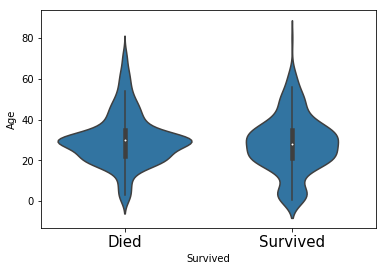

In [26]:
#the relation between the age and the survival rate
sb.violinplot(data = titanic , x = 'Survived' , y = 'Age' , color = sb.color_palette()[0])
plt.xticks([0,1] , ['Died', 'Survived'] , size = 15);

> *there's a difference betweed the two distributions on the width of the spikes. it's more likly to die if the passenger more than 60 and more likely to survive if less than 10 but there's not much to say between the two ages. the box plots are nearly the same so I think may be that difference of the distributions is only because the two rate of survival and death aren't the same in the fisrt place*

In [27]:
#making a small data frame to have the numbers that survived or died for each gender plus the total number
sex_sur = titanic.groupby('Survived')['Sex'].value_counts().unstack()
sex_sur = sex_sur.transpose()
sex_sur['total'] = sex_sur.sum(axis = 1)

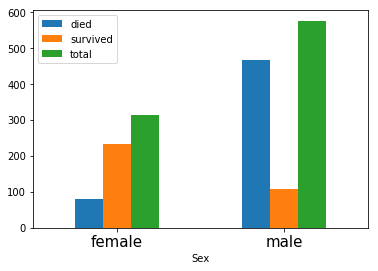

In [28]:
#making the bar graph
sex_sur.plot(kind = 'bar')
plt.xticks(size = 15 , rotation = 0);
plt.legend(['died' , 'survived' , 'total'])

> *woow , that's amazing.... even though the number of men is twice the number of women but the women that survived are even more than twice the number of men that survived.... it wasn't only jack who sacrificed himself I think*

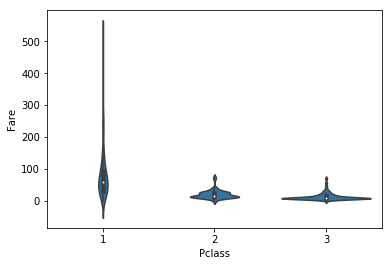

In [29]:
sb.violinplot(data = titanic , x = 'Pclass' , y = 'Fare' , color = sb.color_palette()[0])

>*the outliers in the fair makes it harder to have a clean graph so I am going to cut them*

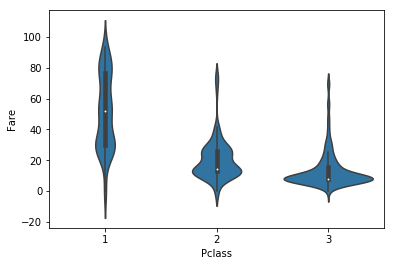

In [30]:
# only including the passengers who have fare less than 100
fare_data = titanic[titanic['Fare'] <= 100]
sb.violinplot(data = fare_data  , x = 'Pclass' , y = 'Fare' , color = sb.color_palette()[0])

>*well I think it's clear now that there's a strong correlation between the classes and Fare, the third class has the lowest mean and distribution then comes the second class then the third class with a much higher mean and very wide distribution*|

In [31]:
#making a small data frame to have the numbers that survived or died for each class plus the total number
class_sur = titanic.groupby('Survived')['Pclass'].value_counts().unstack()
class_sur = class_sur.transpose()
class_sur['total'] = class_sur.sum(axis = 1)

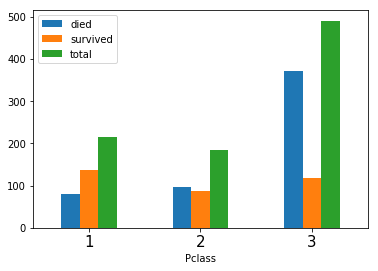

In [32]:
#making the bar graph
class_sur.plot(kind = 'bar')
plt.xticks(size = 15 , rotation = 0);
plt.legend(['died' , 'survived' , 'total'])

> *well, that's interesting. even though the total number of the third class is more than twice the first class  but it appears that the number of survivors in the first class even higher than both the second and the third. and it appears it's highly likely to die if the passenger is in the third class. it's nealry fifty fifty if the passenger is in the 2nd class but it's more likely to survive if the passenger is in the first class*

In [33]:
#making a small data frame to have the numbers that survived or died for each embarked type plus the total number
emb_sur = titanic.groupby('Survived')['Embarked'].value_counts().unstack()
emb_sur = emb_sur.transpose()
emb_sur['total'] = emb_sur.sum(axis = 1)

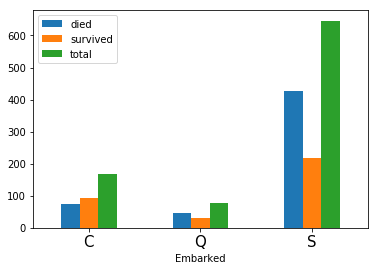

In [34]:
#making the bar graph
emb_sur.plot(kind = 'bar')
plt.xticks(size = 15 , rotation = 0);
plt.legend(['died' , 'survived' , 'total'])

> *well that's also interesting,  it appears it's highly likely to die if the passenger is 'S' Embarked . it's nealry fifty fifty if the passenger is i'Q' but it's more likely to survive if the passenger is 'C'*

In [35]:
#making a small data frame to have the numbers of classes for each embarked type
emb_cls = titanic.groupby('Pclass')['Embarked'].value_counts().unstack()
emb_cls = emb_cls.transpose()

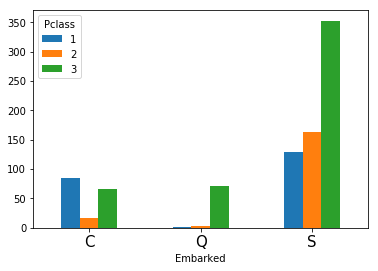

In [36]:
#making the bar graph
emb_cls.plot(kind = 'bar')
plt.xticks(size = 15 , rotation = 0);

> *most of the 'C' embarked are from the first class that eloperate why the 'C' embarked has a higher survival rate than the others. it's simply because most of its passengers are from the first class. the fact that the classes aren't unformally distributed over the embark types makes things harder to interperet.*

Text(0, 0.5, 'Fare')

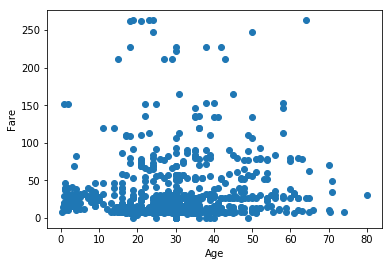

In [37]:
#getting rid of the outliers in Fare and plotting a scatter plot between the Fare and age
fare_cut = titanic [titanic['Fare']<=300]
plt.scatter(fare_cut['Age'] , fare_cut['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')

> *the scatter is very random and it appears that there's no relationship between the two of them*

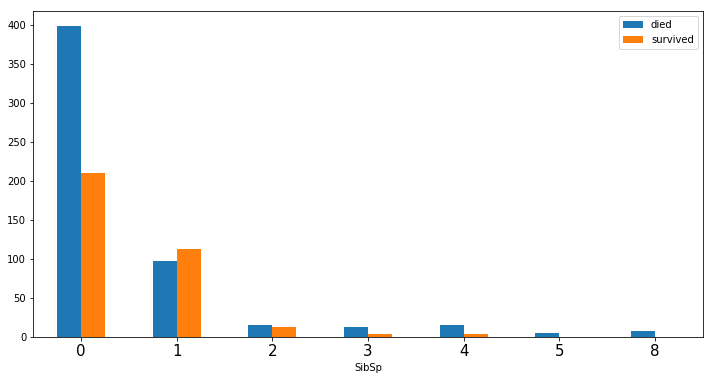

In [38]:
#making a small data frame to have the numbers of classes for each embarked type
sib_sur = titanic.groupby('Survived')['SibSp'].value_counts().unstack()
sib_sur = sib_sur.transpose()

#making the bar graph

sib_sur.plot(kind = 'bar',figsize = (12,6))
plt.xticks(size = 15 , rotation = 0);
plt.legend(['died' , 'survived' ]);

> *most passengers have 0 or 1 and the rest are distributed betwen 2 and 8. so let's make a little bit of preprocessing to that*

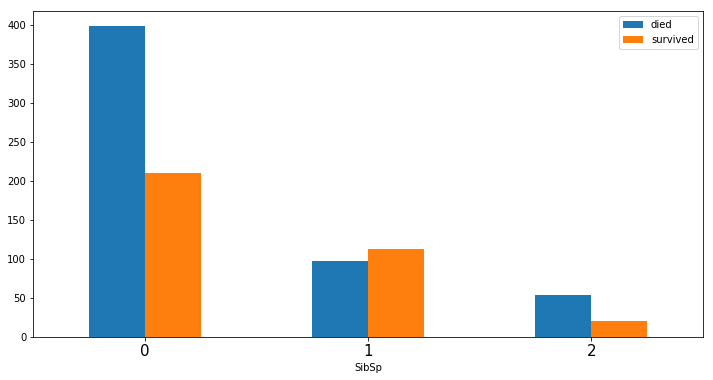

In [39]:
#since the majority of the passengers have zero or one sib so I think it will be better if we gather the sibs between 2 and 8 
#into one value equla 2

def dealwithsib(x):
    if x == 0: 
        return 0 # if the passenger has 0 sib then we will return 0
    if x == 1 :
        return 1 # if the passenger has 1 sib then we will return 1
    return 2 # if the passenger has any sibs other than 0 or 1 we will return 2

titanic['SibSp'] = titanic['SibSp'].apply(dealwithsib) #applying the function

#let's do the graph again then

#making a small data frame to have the numbers of classes for each embarked type
sib_sur = titanic.groupby('Survived')['SibSp'].value_counts().unstack()
sib_sur = sib_sur.transpose()

#making the bar graph

sib_sur.plot(kind = 'bar',figsize = (12,6))
plt.xticks(size = 15 , rotation = 0);
plt.legend(['died' , 'survived' ]);

>*it appears that if the passenger has 1 sib then it's more likely to survive but in any other case it's still more likely to die*

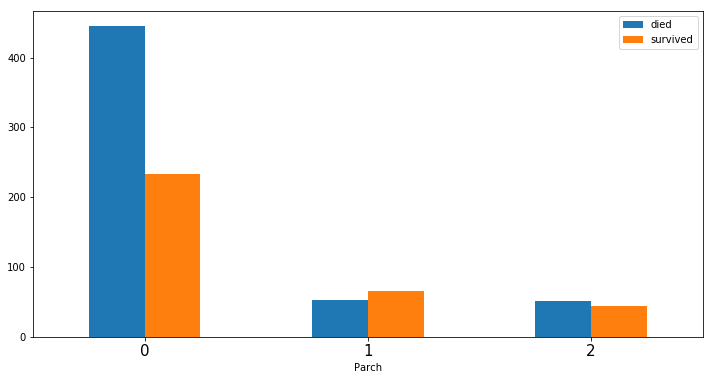

In [40]:
#the Parch column has the same problem as the sibsp problem so we will the take the same approach

titanic['Parch'] = titanic['Parch'].apply(dealwithsib) #applying the function

#making a small data frame to have the numbers of classes for each embarked type
par_sur = titanic.groupby('Survived')['Parch'].value_counts().unstack()
par_sur = par_sur.transpose()

#making the bar graph
par_sur.plot(kind = 'bar',figsize = (12,6))
plt.xticks(size = 15 , rotation = 0);
plt.legend(['died' , 'survived' ]);

>*same as the sibsp which means that there might be a correlation or relation between the both of them*

In [41]:
#the correlation between parch and sibsp
titanic.Parch.corr(titanic.SibSp)

0.45049899918623454

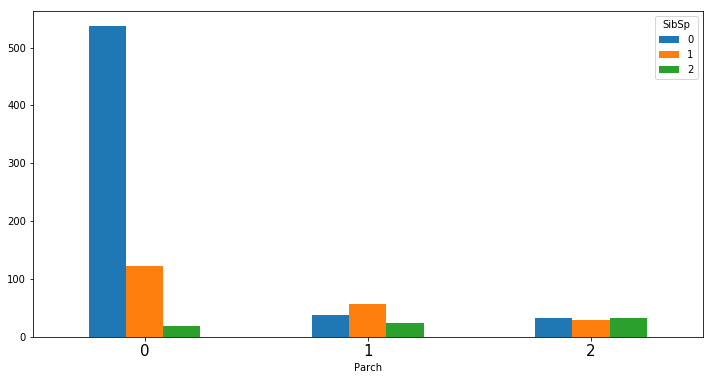

In [42]:
#making a small data frame to have the numbers of classes for each embarked type
par_sib = titanic.groupby('SibSp')['Parch'].value_counts().unstack()
par_sib = par_sib.transpose()

#making the bar graph
par_sib.plot(kind = 'bar',figsize = (12,6))
plt.xticks(size = 15 , rotation = 0);
#plt.legend(['died' , 'survived' ]);

> *not as expected but we can't discard that in case of 0 parch the majority is 0 sibsb the same goes with 1 parch but not with same ratio. that why there's relatively high correlation. that's because the majority of passengers have zero parch and zero sibsb but that doesn't mean that there's a relationship between both of them unfortunately*

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I have discovered some interesting relationships! well at first it's highlt likely to survive if the passenger is female. 

>there's not a clear relationship between the age and the survival rate except for the passengers that are more than 60 and less than 10. if the passenger is more than 60 it's highly likely to die but if the passnger is less than 10 it's highly likely to survive. 

>the P classes has a relationship with the survival rate. it appears it's highly likely to die if the passenger is in the third class. it's nealry fifty fifty if the passenger is in the 2nd class but it's more likely to survive if the passenger is in the first class.

> if the passenger has 1 sibsp or 1 parch then it's more likely to survive
 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> there's a strong relationship between the Pclasses and the fare.

> the p classes aren't unformally distributed over the embark types which makes things harder to interperet.

## Multivariate Exploration


(0, 100)

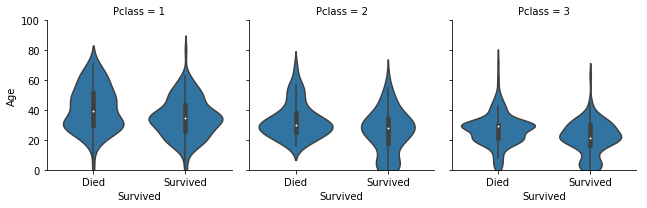

In [43]:
#creating a graph that shows the distribution of age with the two cases of survival and death w.r.t each class
a = sb.FacetGrid(data= titanic, col = 'Pclass'  );
a.map(sb.violinplot , 'Survived' , 'Age' , order = [0,1]);
plt.xticks([0,1] ,['Died' ,'Survived']);
plt.ylim((0,100))

> *well I think we can agree that if the age is less than 10 so it's more likely that the passenger will survived and if the passenger is more than 50 then it's more likeily that they would die regardless of the class that the passenger belongs to*

> *that means that untill now we have no paradox with what we have already deducted*


(0, 100)

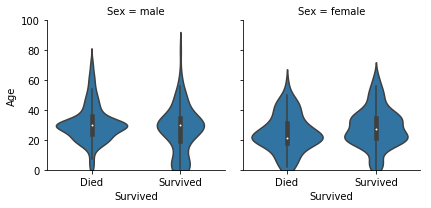

In [44]:
#creating a graph that shows the distribution of age with the two cases of survival and death w.r.t each gender
a = sb.FacetGrid(data= titanic, col = 'Sex'  );
a.map(sb.violinplot , 'Survived' , 'Age' , order = [0,1]);

plt.xticks([0,1] ,['Died' ,'Survived']);
plt.ylim((0,100))


> strangly, our rule about the age only applies on the males that if the age is less than 10 so it's more likely that the passenger will survived and if the passenger is more than 50 then it's more likeily that they would die
>but in case of the females it's the opposite and that's maybe strange but I think the reason is simply because we have more males than females. we have twice the observations so may we didn't have a variety of female observations.

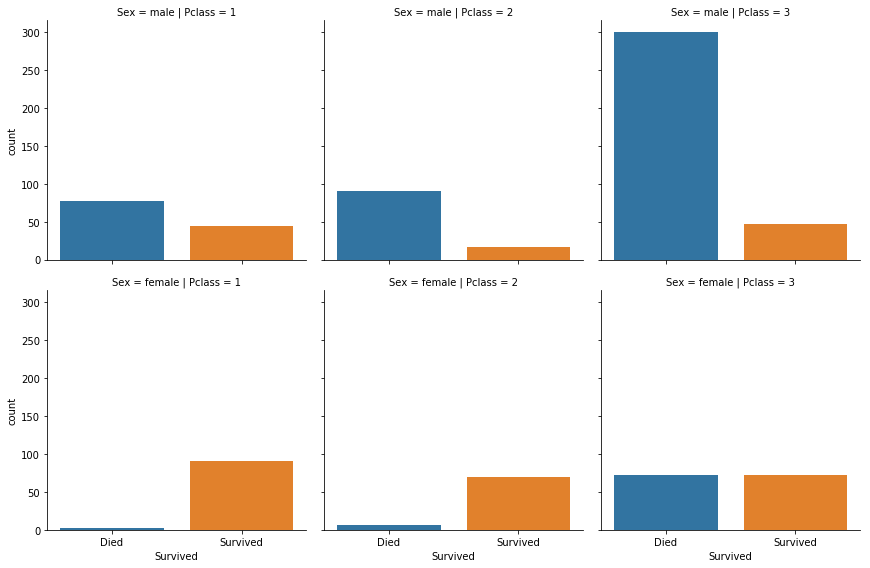

In [45]:
#creating a graph that shows the counts of Survival feature w.r.t each gender as rows and W.r.t each class as columns
sb.catplot("Survived", col="Pclass" ,row = 'Sex', data=titanic,kind="count", height=4, aspect=1)
plt.xticks([0,1] ,['Died' ,'Survived']);



>*wow that's wonderful! in case of the males, regardless of the classes, the death rate is hight. but in the case of females the survival rate is massivly higher than the death rate in both the class one or two and is nearly the same at the third class*

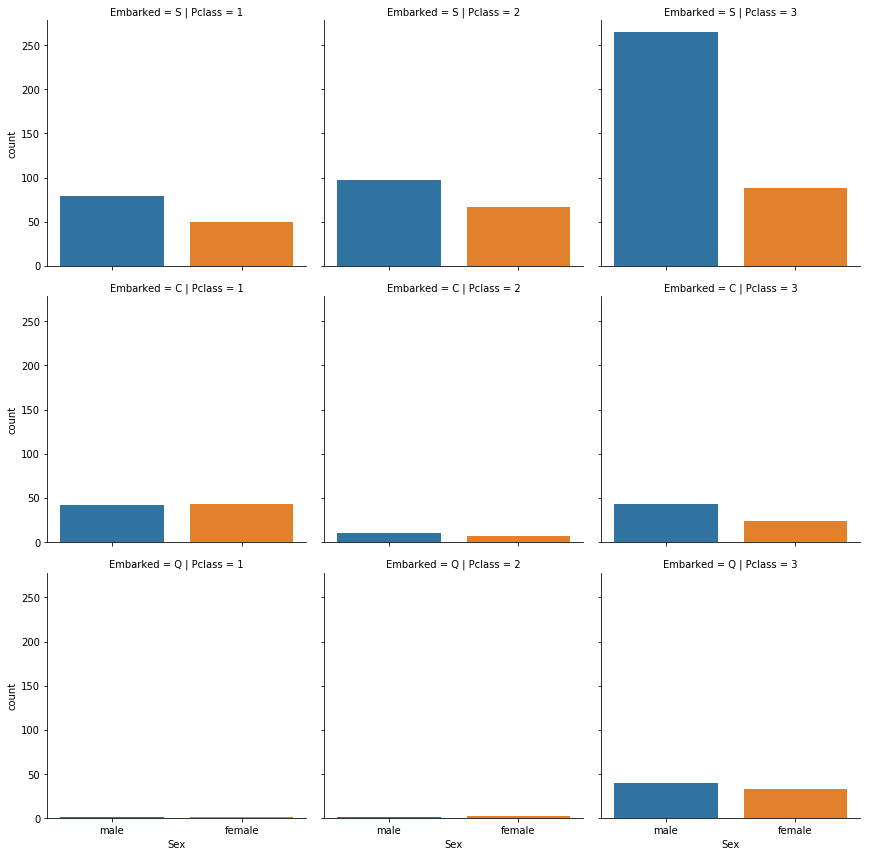

In [46]:
#creating a graph that shows the counts of gender feature w.r.t each Embarked as rows and W.r.t each class as columns
sb.catplot("Sex", col="Pclass" ,row = 'Embarked', data=titanic,kind="count", height=4, aspect=1)

>*well I don't see anything stange about these counts. the males in general are twich the females so it's normal si see that the males are more than the females in most of the cases or even close to them*

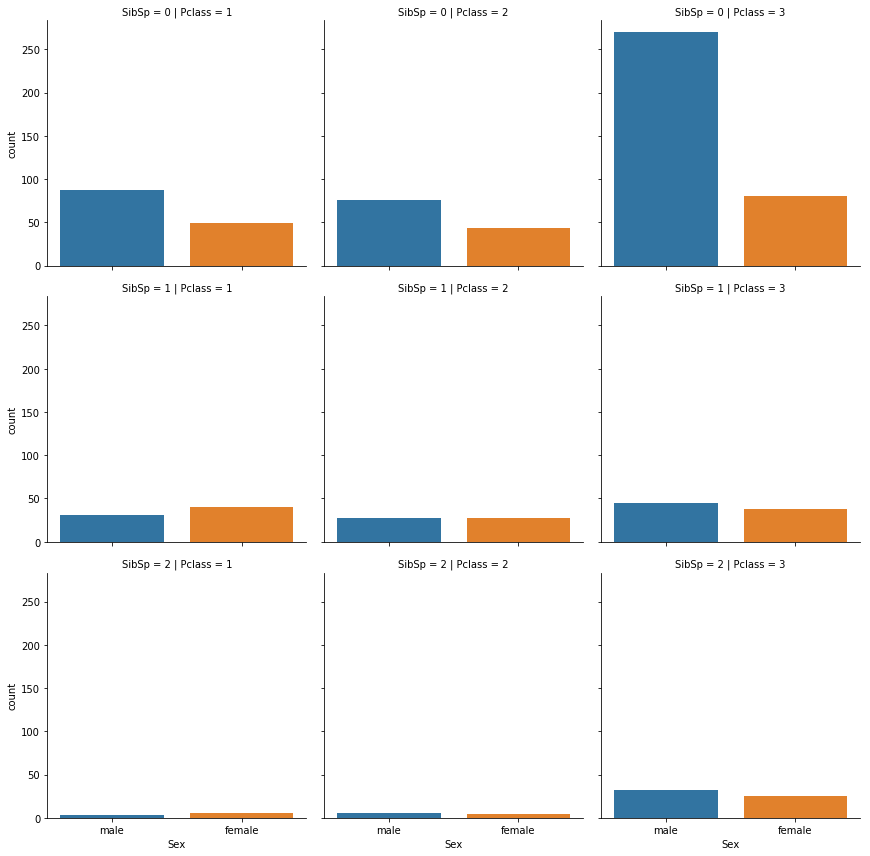

In [47]:
#creating a graph that shows the counts of gender feature w.r.t each Embarked as rows and W.r.t each class as columns
sb.catplot("Sex", col="Pclass" ,row = 'SibSp', data=titanic,kind="count", height=4, aspect=1)

>*well I don't see anything stange about these counts. the males in general are twich the females so it's normal si see that the males are more than the females in most of the cases or even close to them*

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> well we knew that our age rule is probably true w.r.t to the main distribution and the w.r.t the classes distribution and w.r.t the male distribution but not the females distribution maybe because the lack of female observations.

>from the bivariate graphs we know that the first class has the highest survival rate but what we have discovered is that when we take the gender into consideration we find that the males in the first class has a higher death rate and the females are the ones who dominate the survival rate at that class that nearly no female died from the first class which is astonishing.

### Were there any interesting or surprising interactions between features?

> with disappointment, I haven't found any thing useful if I exclude the survival feature. in the bivariate I found some results but I didn't find anything here. maybe that data features are independant of each other and only related to the survival feature